<a href="https://colab.research.google.com/github/Prakriti-Sahu/FoML/blob/main/assign-4_q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q5. Logistic Regression**

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

**Train data and Test data entered**

In [4]:
d=np.array([[0.346,0.780,0],[0.303,0.439,0],[0.358,0.729,0],[0.602,0.863,1],[0.790,0.753,1],[0.611,0.965,1]])
train_data=pd.DataFrame(data=d, columns=['x1','x2','y'])
train_data

,x1,x2,y
0,0.346,0.780,0.0
1,0.303,0.439,0.0
2,0.358,0.729,0.0
3,0.602,0.863,1.0
4,0.790,0.753,1.0
5,0.611,0.965,1.0


In [5]:
te=np.array([[0.959,0.382,0],[0.750,0.306,0],[0.395,0.760,0],[0.823,0.764,1],[0.761,0.874,1],[0.844,0.435,1]])
test_data=pd.DataFrame(data=te, columns=['x1','x2','y'])
test_data

,x1,x2,y
0,0.959,0.382,0.0
1,0.750,0.306,0.0
2,0.395,0.760,0.0
3,0.823,0.764,1.0
4,0.761,0.874,1.0
5,0.844,0.435,1.0


### **Logistic Regresseion Model**

**Defining necessary functions**

In [6]:
# Sigmoid function
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))


# Hypothesis function
def hypothesis(X,theta):
 return sigmoid(np.dot(X,theta))


# Cross Entropy Error = (y*log(y_) +(1-y)*log(1-y_))/n
def error(X,y,theta):  
  h_i=hypothesis(X,theta)
  error=-1*np.mean((y*np.log(h_i)+(1-y)*np.log(1-h_i))) 

  return error


# updating gradient
def gradient(X,y,theta):
  h_i=hypothesis(X,theta)
  grad=-np.dot(X.T,y-h_i)
  m=X.shape[0]

  return grad/m


#Gradient Descent
def gradient_descent(X,y,lr=0.1,max_itr=800):
  n=X.shape[1]
  #theta=np.zeros((n,1))
  theta=np.array([-1,1.5,0.5]).reshape((-1,1))
  print("Initial Theta:\n",theta)
  errlist=[]

  for i in range(max_itr):    
    err=error(X,y,theta)
    errlist.append(err)
    grad=gradient(X,y,theta)
    theta=theta-lr*grad
    if(i==0):
      print("\n\nAfter 1st Iteration:\n",theta)

  return (theta,errlist)

###**Training**

Adding Bias

In [7]:
ones=np.ones((train_data.shape[0],1))
train_data=np.hstack((ones,train_data))
print(train_data)

[[1.    0.346 0.78  0.   ]
 [1.    0.303 0.439 0.   ]
 [1.    0.358 0.729 0.   ]
 [1.    0.602 0.863 1.   ]
 [1.    0.79  0.753 1.   ]
 [1.    0.611 0.965 1.   ]]


Reshaping for dot product

In [8]:
theta,errlist=gradient_descent(train_data[:,:-1],train_data[:,-1].reshape((-1,1))) 

Initial Theta:
 [[-1. ]
 [ 1.5]
 [ 0.5]]


After 1st Iteration:
 [[-1.00316626]
 [ 1.50535086]
 [ 0.50196867]]


Error Plot

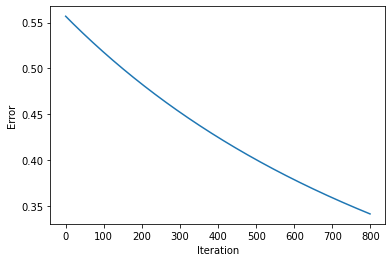

In [9]:
plt.plot(errlist) 
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [10]:
print("Theta is:\n",theta)        # after 800 iterations

Theta is:
 [[-3.36112592]
 [ 4.74111282]
 [ 1.45603588]]


Train Data Plot - Line is separating the classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


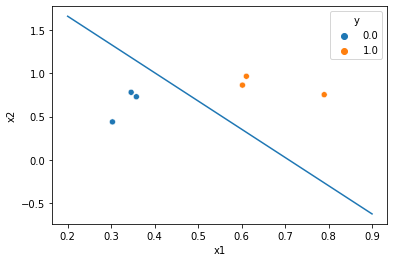

In [11]:
t=pd.DataFrame(train_data,columns=['1','x1','x2','y'])
x_1=np.linspace(0.2,0.9)
x_2=-(theta[0]+theta[1]*x_1)/theta[2]
plt.plot(x_1,x_2)
sns.scatterplot(t.x1,t.x2,hue=t.y,data=train_data)

Test Data Plot - There is misclassification

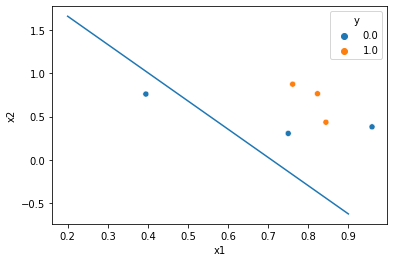

In [12]:
x_1=np.linspace(0.2,0.9)
x_2=-(theta[0]+theta[1]*x_1)/theta[2]
plt.plot(x_1,x_2)
sns.scatterplot(x='x1',y='x2',hue='y',data=test_data)

###**Testing**

In [13]:
ones=np.ones((test_data.shape[0],1))
test_data_1=np.hstack((ones,test_data))
test_data_1

array([[1.   , 0.959, 0.382, 0.   ],
       [1.   , 0.75 , 0.306, 0.   ],
       [1.   , 0.395, 0.76 , 0.   ],
       [1.   , 0.823, 0.764, 1.   ],
       [1.   , 0.761, 0.874, 1.   ],
       [1.   , 0.844, 0.435, 1.   ]])

In [14]:
y_pred=[]
for i in range(test_data.shape[0]):
  y_=hypothesis(test_data_1[i,:-1],theta)
  if(y_<=0.5):
    y_pred.append(0)
  else:
    y_pred.append(1)


k=test_data.y

print("Predicted 'y' value for test data set: ",y_pred)
print("Actual 'y' value of test data set: ", list(k.astype(int)))
acc=accuracy_score(test_data.y,y_pred)
print("\nTest Accuracy: ",acc)

Predicted 'y' value for test data set:  [1, 1, 0, 1, 1, 1]
Actual 'y' value of test data set:  [0, 0, 0, 1, 1, 1]

Test Accuracy:  0.6666666666666666


**Accuracy, Precision, Recall**

In [15]:
print (classification_report(test_data.y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

